# King County House Price Prediction with Linear Regression

This notebook demonstrates how to predict house prices in King County using Linear Regression. We'll analyze the relationship between various house features and their sale prices.

## 1. Import Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the Dataset

In [8]:
# Load the dataset and validate it
df = pd.read_csv('https://raw.githubusercontent.com/ShifengWu/AISV.X401.21.finalProject/refs/heads/main/kc_house_data.csv')
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found!")
print("\n" + "="*50)
print("Statistical Summary:")
df.describe()

No missing values found!

Statistical Summary:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3. Data Preprocessing

In [ ]:
# Convert date column to datetime and extract useful features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create age of house feature
df['house_age'] = df['year'] - df['yr_built']

# Create renovated flag
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)

# Create price per sqft feature for analysis
df['price_per_sqft'] = df['price'] / df['sqft_living']

print("New features created:")
print("- year, month (from date)")
print("- house_age (current year - yr_built)")
print("- is_renovated (binary flag)")
print("- price_per_sqft (price per square foot)")

New features created:
- year, month (from date)
- house_age (current year - yr_built)
- is_renovated (binary flag)
- price_per_sqft (price per square foot)


## 4. Exploratory Data Analysis (EDA)

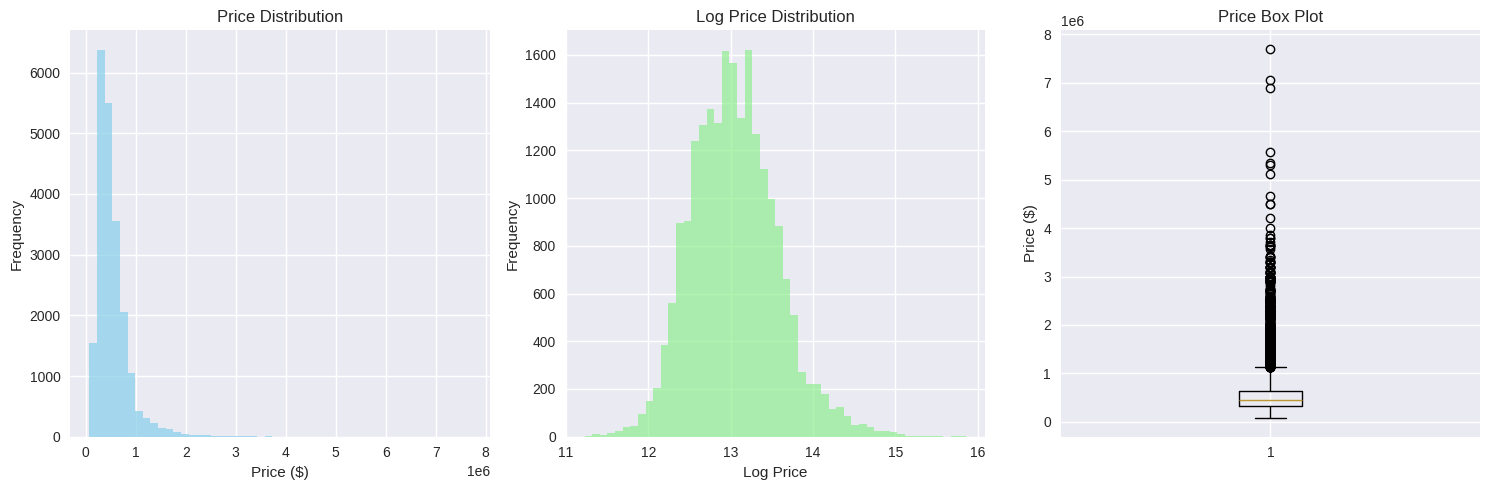

Price statistics:
Mean: $540,088.14
Median: $450,000.00
Min: $75,000.00
Max: $7,700,000.00


In [ ]:
# Price distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=50, alpha=0.7, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(np.log(df['price']), bins=50, alpha=0.7, color='lightgreen')
plt.title('Log Price Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(df['price'])
plt.title('Price Box Plot')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

print(f"Price statistics:")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")

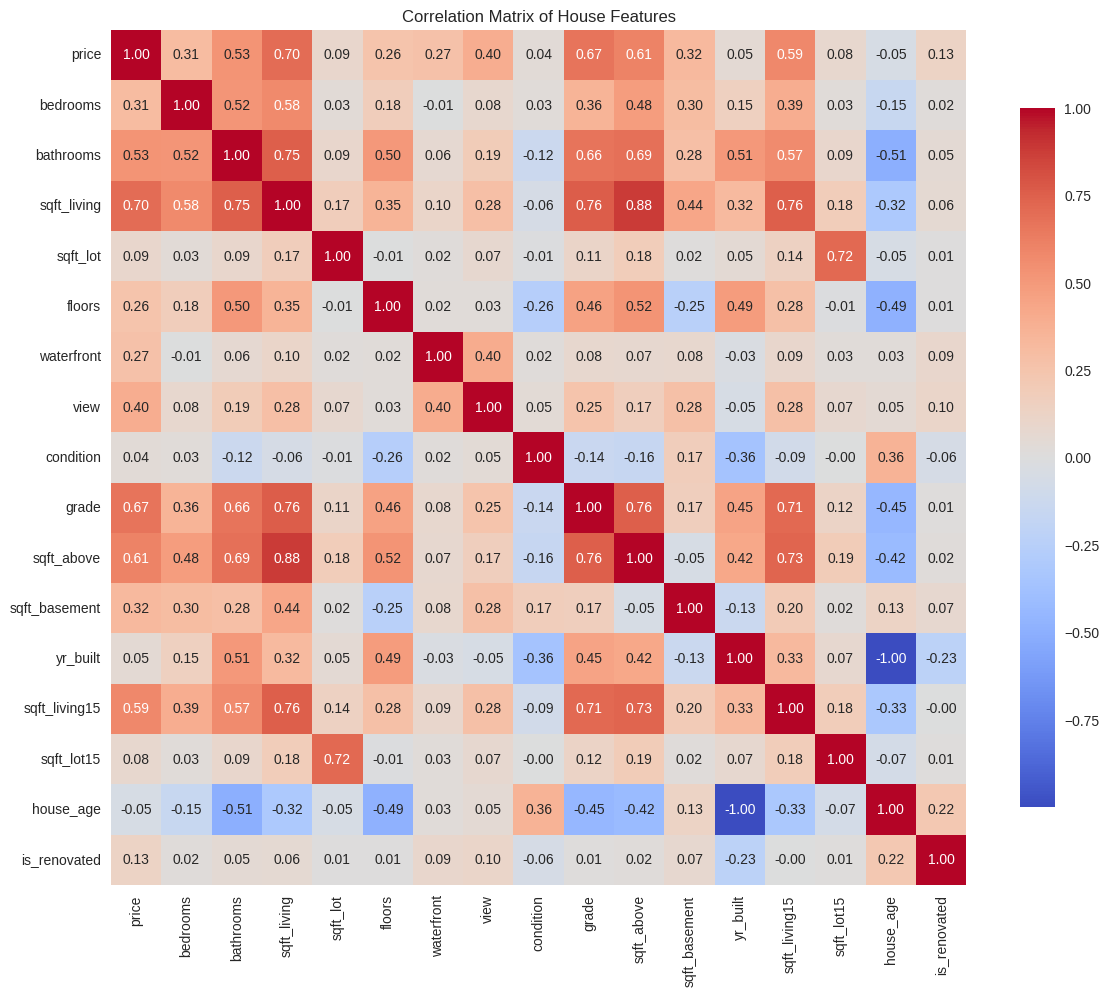


Features most correlated with price:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
Name: price, dtype: float64


In [ ]:
# Correlation matrix for numerical features
numerical_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                     'floors', 'waterfront', 'view', 'condition', 'grade',
                     'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
                     'sqft_lot15', 'house_age', 'is_renovated']

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of House Features')
plt.tight_layout()
plt.show()

# Show features most correlated with price
price_corr = correlation_matrix['price'].abs().sort_values(ascending=False)
print("\nFeatures most correlated with price:")
print(price_corr.head(10))

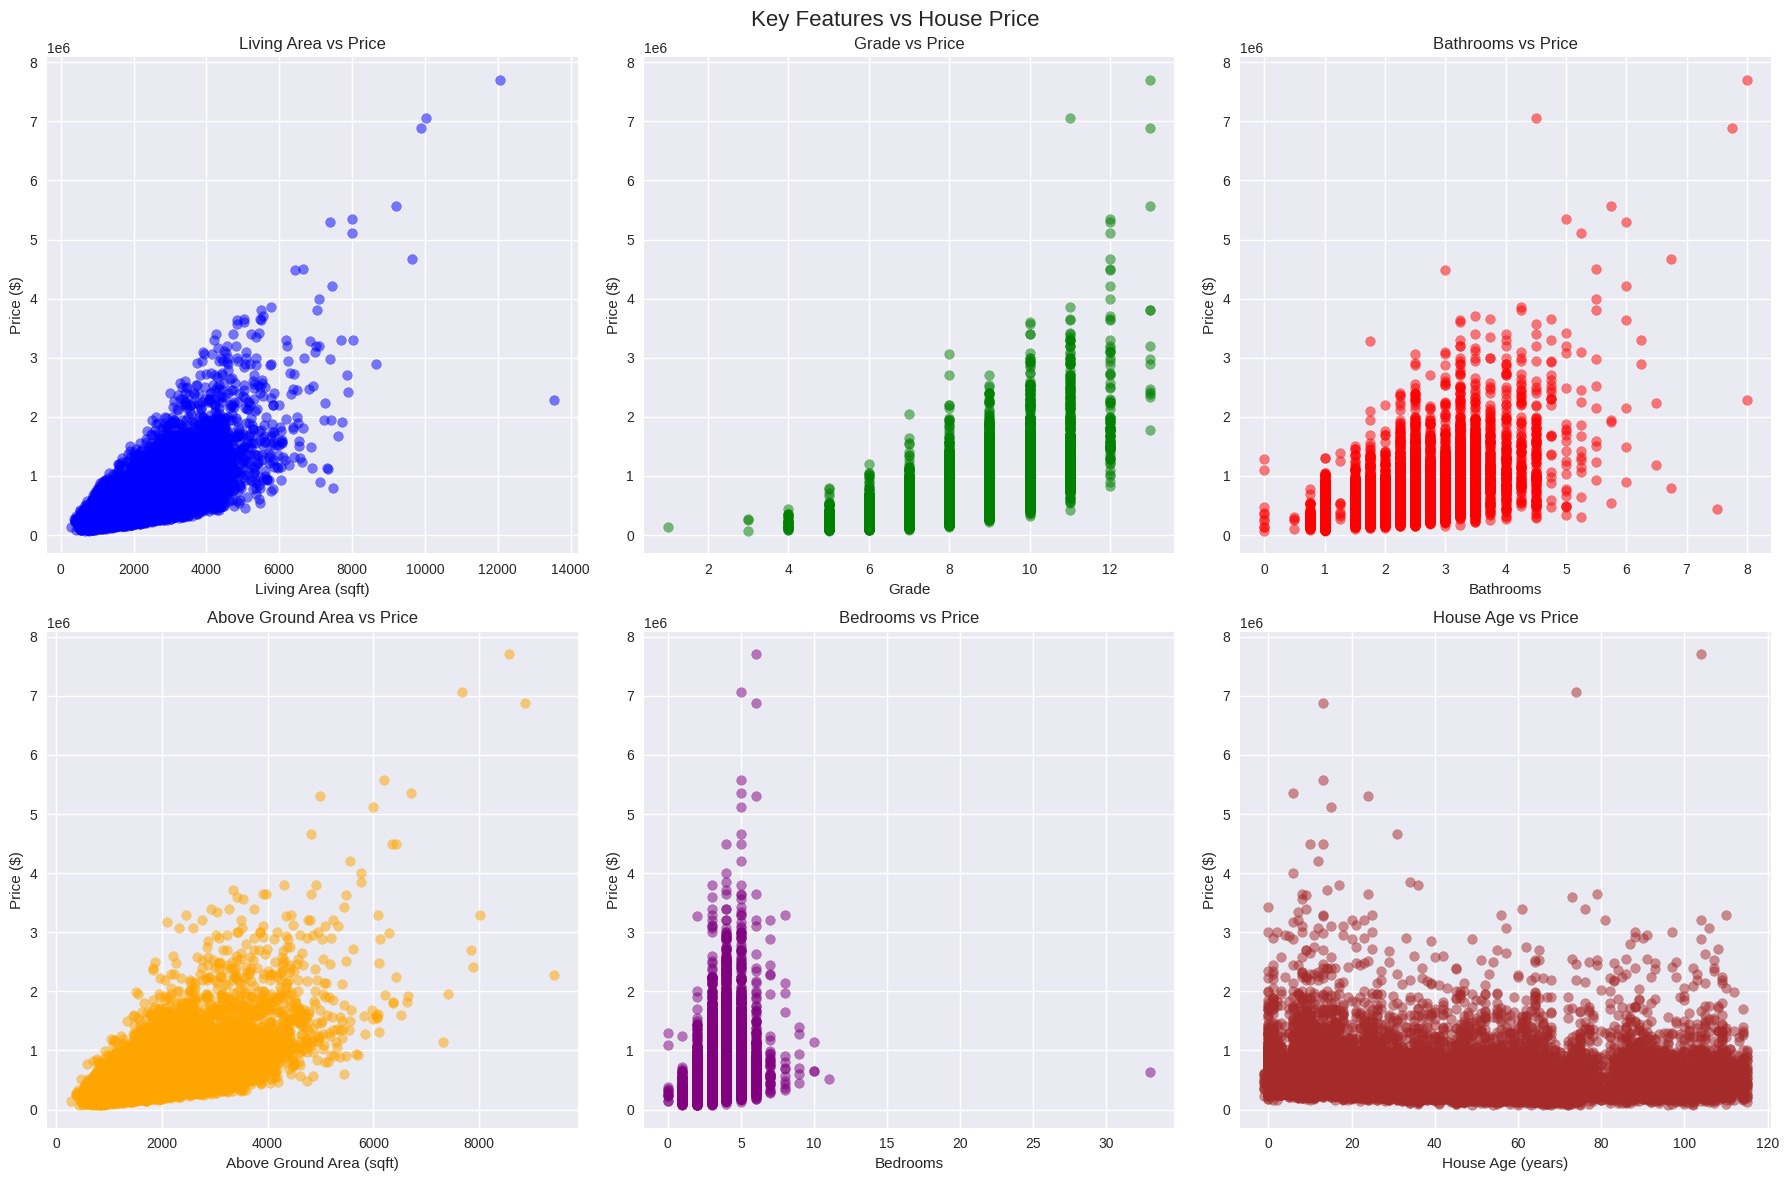

In [ ]:
# Scatter plots of key features vs price
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Key Features vs House Price', fontsize=16)

# sqft_living vs price
axes[0, 0].scatter(df['sqft_living'], df['price'], alpha=0.5, color='blue')
axes[0, 0].set_xlabel('Living Area (sqft)')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Living Area vs Price')

# grade vs price
axes[0, 1].scatter(df['grade'], df['price'], alpha=0.5, color='green')
axes[0, 1].set_xlabel('Grade')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Grade vs Price')

# bathrooms vs price
axes[0, 2].scatter(df['bathrooms'], df['price'], alpha=0.5, color='red')
axes[0, 2].set_xlabel('Bathrooms')
axes[0, 2].set_ylabel('Price ($)')
axes[0, 2].set_title('Bathrooms vs Price')

# sqft_above vs price
axes[1, 0].scatter(df['sqft_above'], df['price'], alpha=0.5, color='orange')
axes[1, 0].set_xlabel('Above Ground Area (sqft)')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Above Ground Area vs Price')

# bedrooms vs price
axes[1, 1].scatter(df['bedrooms'], df['price'], alpha=0.5, color='purple')
axes[1, 1].set_xlabel('Bedrooms')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Bedrooms vs Price')

# house_age vs price
axes[1, 2].scatter(df['house_age'], df['price'], alpha=0.5, color='brown')
axes[1, 2].set_xlabel('House Age (years)')
axes[1, 2].set_ylabel('Price ($)')
axes[1, 2].set_title('House Age vs Price')

plt.tight_layout()
plt.show()

## 5. Feature Selection and Model Preparation

In [ ]:
# Select features for the model
# Based on correlation analysis and domain knowledge
selected_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above',
    'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
    'house_age', 'is_renovated'
]

# Prepare features (X) and target (y)
X = df[selected_features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Training set size: 17290 samples
Testing set size: 4323 samples
Training set percentage: 80.0%
Testing set percentage: 20.0%


Training set size: 17290 samples
Testing set size: 4323 samples
Training set percentage: 80.0%
Testing set percentage: 20.0%


## 6. Linear Regression Model Training

In [ ]:
# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")
print(f"Model intercept: ${lr_model.intercept_:,.2f}")
print(f"Number of coefficients: {len(lr_model.coef_)}")

Linear Regression model trained successfully!
Model intercept: $-47,592,395.54
Number of coefficients: 16


Feature Coefficients (sorted by absolute value):
          Feature    Coefficient  Abs_Coefficient
5      waterfront  556213.966416    556213.966416
8           grade  118316.286458    118316.286458
1       bathrooms   49029.271076     49029.271076
6            view   43444.934279     43444.934279
0        bedrooms  -38791.927105     38791.927105
4          floors   28729.918574     28729.918574
14      house_age   26757.109457     26757.109457
15   is_renovated   23155.102586     23155.102586
11       yr_built   23133.868665     23133.868665
7       condition   18224.516528     18224.516528
2     sqft_living     108.279631       108.279631
10  sqft_basement      57.673839        57.673839
9      sqft_above      50.605792        50.605792
12  sqft_living15      25.606960        25.606960
13     sqft_lot15      -0.462930         0.462930
3        sqft_lot      -0.047401         0.047401


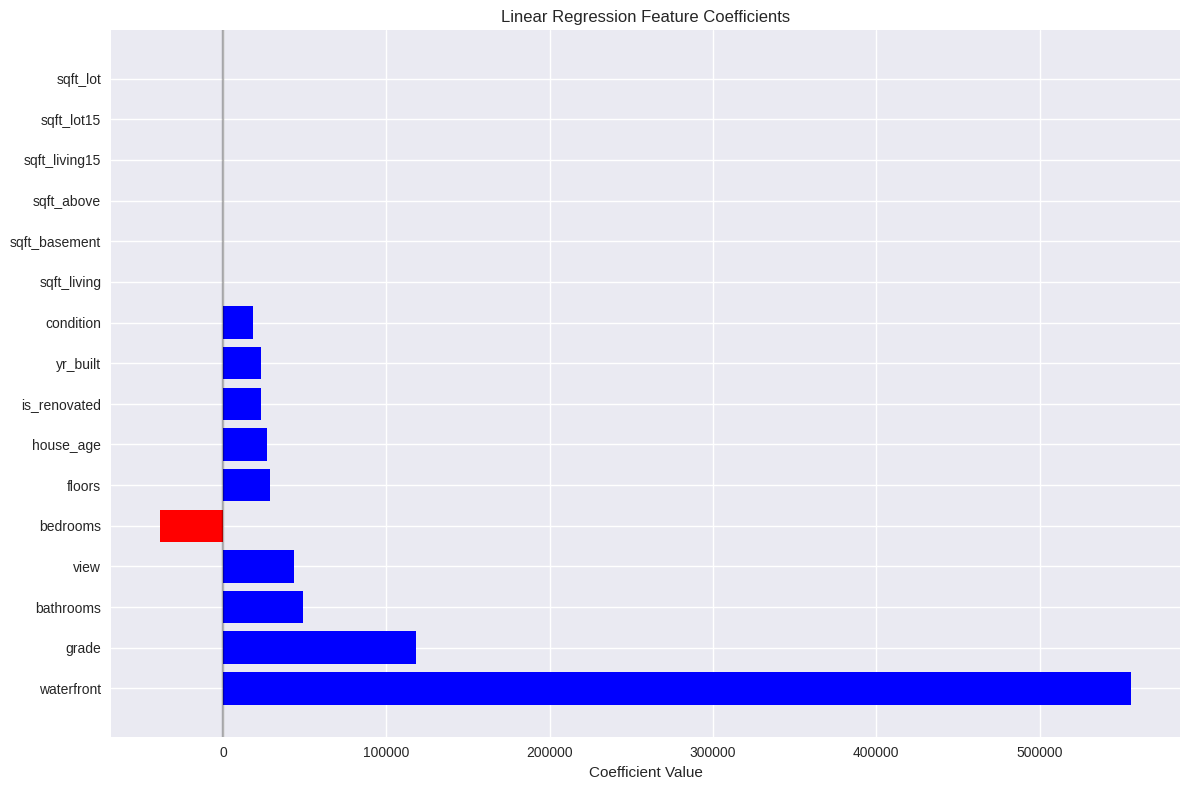

In [ ]:
# Display feature coefficients
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lr_model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("Feature Coefficients (sorted by absolute value):")
print(feature_importance)

# Visualize feature coefficients
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in feature_importance['Coefficient']]
plt.barh(range(len(feature_importance)), feature_importance['Coefficient'], color=colors)
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Feature Coefficients')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Model Evaluation

In [ ]:
# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Model Performance Metrics:")
print("=" * 40)
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"")
print(f"Training RMSE: ${train_rmse:,.2f}")
print(f"Testing RMSE: ${test_rmse:,.2f}")
print(f"")
print(f"Training MAE: ${train_mae:,.2f}")
print(f"Testing MAE: ${test_mae:,.2f}")

# Calculate percentage errors
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"")
print(f"Training MAPE: {train_mape:.2f}%")
print(f"Testing MAPE: {test_mape:.2f}%")

Model Performance Metrics:
Training R² Score: 0.6546
Testing R² Score: 0.6551

Training RMSE: $212,425.02
Testing RMSE: $228,346.01

Training MAE: $138,399.03
Testing MAE: $143,143.18

Training MAPE: 29.08%
Testing MAPE: 29.05%


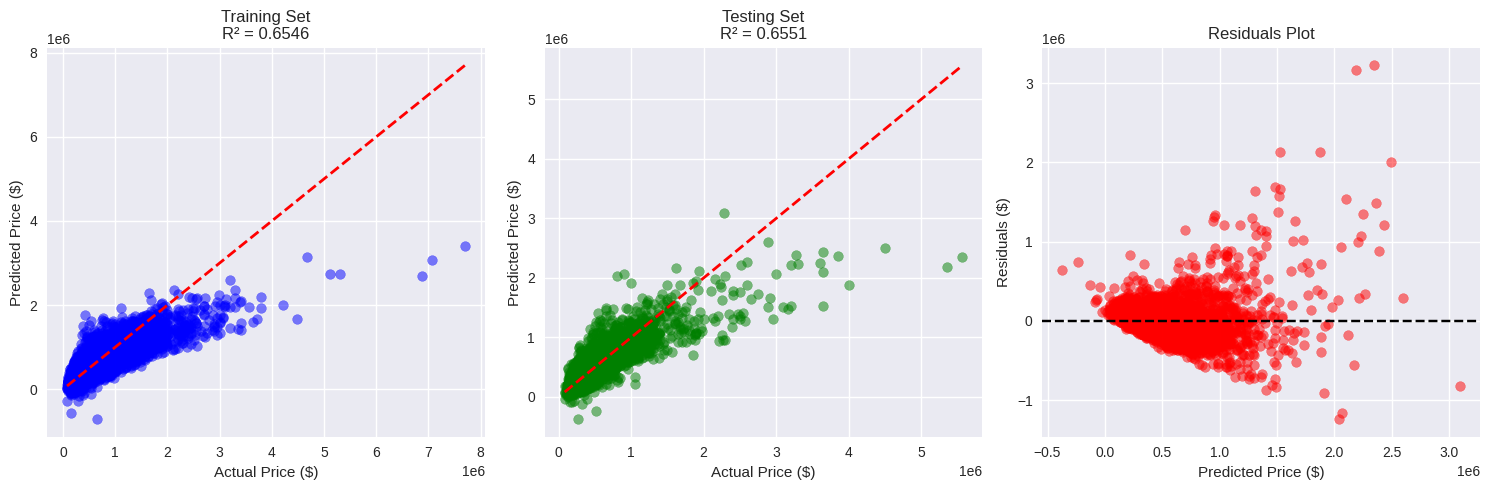

In [ ]:
# Visualize predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Training Set\nR² = {train_r2:.4f}')

# Testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Testing Set\nR² = {test_r2:.4f}')

# Residuals plot
plt.subplot(1, 3, 3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

## 8. Model Interpretation and Insights

In [ ]:
# Analyze the most important features
print("Model Insights:")
print("=" * 50)

top_positive = feature_importance[feature_importance['Coefficient'] > 0].head(5)
top_negative = feature_importance[feature_importance['Coefficient'] < 0].head(5)

print("\nTop 5 features that INCREASE house price:")
for _, row in top_positive.iterrows():
    print(f"  • {row['Feature']}: +${row['Coefficient']:,.2f} per unit")

print("\nTop 5 features that DECREASE house price:")
for _, row in top_negative.iterrows():
    print(f"  • {row['Feature']}: ${row['Coefficient']:,.2f} per unit")

print(f"\nModel Interpretation:")
print(f"• The model explains {test_r2:.1%} of the variance in house prices")
print(f"• Average prediction error: ${test_mae:,.0f} (±{test_mape:.1f}%)")
print(f"• The model performs {'well' if test_r2 > 0.7 else 'moderately' if test_r2 > 0.5 else 'poorly'} on unseen data")

Model Insights:

Top 5 features that INCREASE house price:
  • waterfront: +$556,213.97 per unit
  • grade: +$118,316.29 per unit
  • bathrooms: +$49,029.27 per unit
  • view: +$43,444.93 per unit
  • floors: +$28,729.92 per unit

Top 5 features that DECREASE house price:
  • bedrooms: $-38,791.93 per unit
  • sqft_lot15: $-0.46 per unit
  • sqft_lot: $-0.05 per unit

Model Interpretation:
• The model explains 65.5% of the variance in house prices
• Average prediction error: $143,143 (±29.0%)
• The model performs moderately on unseen data


## 9. Making Predictions on New Data

In [ ]:
# Example: Predict price for a sample house
# Let's use the first house in our test set as an example
sample_house = X_test.iloc[0:1]
actual_price = y_test.iloc[0]
predicted_price = lr_model.predict(sample_house)[0]

print("Sample House Prediction:")
print("=" * 30)
print("House Features:")
for feature, value in sample_house.iloc[0].items():
    print(f"  {feature}: {value}")

print(f"\nActual Price: ${actual_price:,.2f}")
print(f"Predicted Price: ${predicted_price:,.2f}")
print(f"Prediction Error: ${abs(actual_price - predicted_price):,.2f}")
print(f"Percentage Error: {abs(actual_price - predicted_price) / actual_price * 100:.2f}%")

Sample House Prediction:
House Features:
  bedrooms: 4.0
  bathrooms: 2.25
  sqft_living: 2070.0
  sqft_lot: 8893.0
  floors: 2.0
  waterfront: 0.0
  view: 0.0
  condition: 4.0
  grade: 8.0
  sqft_above: 2070.0
  sqft_basement: 0.0
  yr_built: 1986.0
  sqft_living15: 2390.0
  sqft_lot15: 7700.0
  house_age: 28.0
  is_renovated: 0.0

Actual Price: $365,000.00
Predicted Price: $518,810.41
Prediction Error: $153,810.41
Percentage Error: 42.14%


In [ ]:
# Function to predict house price for custom input
def predict_house_price(bedrooms, bathrooms, sqft_living, sqft_lot, floors,
                       waterfront, view, condition, grade, sqft_above,
                       sqft_basement, yr_built, sqft_living15, sqft_lot15,
                       house_age, is_renovated):
    """
    Predict house price based on input features
    """
    features = np.array([[bedrooms, bathrooms, sqft_living, sqft_lot, floors,
                         waterfront, view, condition, grade, sqft_above,
                         sqft_basement, yr_built, sqft_living15, sqft_lot15,
                         house_age, is_renovated]])

    predicted_price = lr_model.predict(features)[0]
    return predicted_price
# Example prediction for a hypothetical house
example_price = predict_house_price(
    bedrooms=3, bathrooms=1, sqft_living=1230, sqft_lot=4200, floors=1,
    waterfront=0, view=1, condition=6, grade=6, sqft_above=1230,
    sqft_basement=0, yr_built=1952, sqft_living15=1230, sqft_lot15=4200,
    house_age=73, is_renovated=0
)
print(f"\nExample House Prediction:")
print(f"3 bed, 1 bath, 1230 sqft house built in 1952")
print(f"Predicted Price: ${example_price:,.2f}")


Example House Prediction:
3 bed, 1 bath, 1230 sqft house built in 1952
Predicted Price: $567,040.49


## 10. Model Limitations and Improvements

## Summary

This notebook demonstrated a complete machine learning pipeline for predicting house prices in King County using Linear Regression:

1. **Data Loading & Exploration**: Loaded and examined the dataset structure
2. **Data Preprocessing**: Created new features and prepared data for modeling
3. **Exploratory Data Analysis**: Visualized relationships between features and price
4. **Feature Selection**: Selected relevant features based on correlation analysis
5. **Model Training**: Trained a Linear Regression model
6. **Model Evaluation**: Assessed performance using multiple metrics
7. **Model Interpretation**: Analyzed feature importance and coefficients
8. **Predictions**: Made predictions on new data
9. **Limitations**: Discussed model limitations and potential improvements

The Linear Regression model provides a good baseline for house price prediction and offers interpretable results, making it easy to understand which features most influence house prices.